# Using MetricFlow in Python

This notebook shows how to use the MetricFlow Python API in a Jupyter notebook environment to query metrics and dimensions. 

Full documentation for the MetricFlow Python client can be found [here](https://github.com/transform-data/metricflow/blob/main/metricflow/api/metricflow_client.py)

Import Packages

In [8]:
from metricflow import MetricFlowClient
import pandas as pd
import matplotlib.pyplot as plt

Set up MetricFlow client from config file. This file is generated when you run mf setup.

In [9]:
mf = MetricFlowClient.from_config(config_file_path="/Users/heshamnawaz/.metricflow/config.yml")

You can list metrics using the command line.

In [10]:
!mf list-metrics

✔ 🌱 We've found 13 metrics.
The list below shows metrics in the format of "metric_name: list of available dimensions"
• cancellations: customer__country__region, customer__ds, ds, is_large, quick_buy_transaction
• cancellation_rate: customer__country__region, customer__ds, ds, is_large, quick_buy_transaction
• revenue_usd: customer__country__region, customer__ds, ds, is_large, quick_buy_transaction
• cancellations_mx: customer__country__region, customer__ds, ds, is_large, quick_buy_transaction
• transaction_usd_na: customer__country__region, customer__ds, ds, is_large, quick_buy_transaction
• transaction_usd_l7d_mx: customer__country__region, customer__ds, ds, is_large, quick_buy_transaction
• transaction_usd_mtd: customer__country__region, customer__ds, ds, is_large, quick_buy_transaction
• transaction_usd_na_l7d: customer__country__region, customer__ds, ds, is_large, quick_buy_transaction
• transaction_amount_usd: customer__country__region, customer__ds, ds, is_large, quick_buy_trans

You can also list metrics with the list_metrics method.

In [11]:
mf.list_metrics().keys()

dict_keys(['cancellations', 'cancellation_rate', 'revenue_usd', 'cancellations_mx', 'transaction_usd_na', 'transaction_usd_l7d_mx', 'transaction_usd_mtd', 'transaction_usd_na_l7d', 'transaction_amount_usd', 'transactions', 'quick_buy_amount_usd', 'quick_buy_transactions', 'new_customers'])

You can see all available dimensions for a given metric or metrics using the list_dimensions method.

In [12]:
mf.list_dimensions(metric_names=["revenue_usd"])

[Dimension(name='customer__country__region'),
 Dimension(name='customer__ds'),
 Dimension(name='ds'),
 Dimension(name='is_large'),
 Dimension(name='quick_buy_transaction')]

You can store the results of the query in a Pandas dataframe using the query method and result_df attribute.

In [13]:
query_results = mf.query(metrics=["revenue_usd"], dimensions=["ds"])


In [14]:
df = query_results.result_df
df.head()

,revenue_usd,ds
0,488.01,2022-03-07
1,577.00,2022-03-08
2,7.66,2022-03-09
3,79.88,2022-03-10
4,0.00,2022-03-11


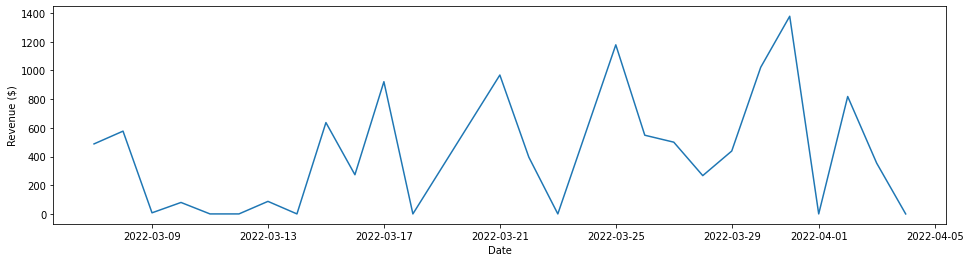

In [15]:
plt.figure(figsize=(16, 4))
plt.xlabel("Date")
plt.ylabel("Revenue ($)")
plt.plot(df.ds, df.revenue_usd)
plt.show()